<a href="https://colab.research.google.com/github/tarunchand/Intelligent-Systems/blob/main/cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore')

from matplotlib import pyplot

from matplotlib import rcParams
rcParams['font.family'] = 'Times New Roman'
rcParams['font.size'] = '10'

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

names = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Trend', 'SocialSentiment', 'FutureTrend']
dataset = pandas.read_csv('data.csv', names=names, skiprows=[0])
print('\n=====================Number of NaN values in each column===================')
print(dataset.isnull().sum())
dataset.fillna(0, inplace=True)


=====================Number of NaN values in each column===================
Date                 0
Open                 0
High                 0
Low                  0
Close                0
Volume               0
Trend                0
SocialSentiment    503
FutureTrend          0
dtype: int64


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for column in dataset.columns:
  if dataset[column].dtype == type(object):
    dataset[column] = le.fit_transform(dataset[column].astype(str))

print('\n==================== class distribution ===================')
class_counts = dataset.groupby('FutureTrend').size()
print(class_counts)


==================== class distribution ===================
FutureTrend
0    247
1      2
2    254
dtype: int64


In [ ]:
array = dataset.values
X = array[:,0:8]
Y = array[:,8]
validation_size = 0.30
num_folds = 10
seed = 7
scoring = 'accuracy'
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [ ]:
models = []
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('ET', ExtraTreesClassifier()))
print('\n============= models evaluation on normal dataset==============')
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = '%s: %f {%f}' % (name, cv_results.mean() * 100, cv_results.std())
  print(msg)


============= models evaluation on normal dataset==============
GBM: 49.111111 {0.106198}
RF: 48.817460 {0.085883}
ET: 51.714286 {0.071371}



=========================compare algorithms graphically===================


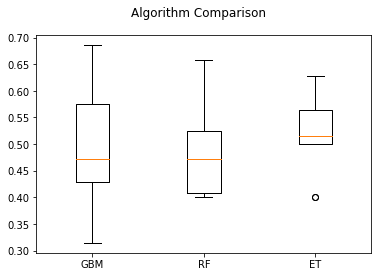

In [ ]:
print('\n=========================compare algorithms graphically===================')
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
print('\n=============== Make prediction on validation dataset ==============')
prediction_accuracy = []
print('\n=================GBM accuracy on validation dataset ================')
gbm_accuracy = []
gbm = GradientBoostingClassifier()
gbm.fit(X_train, Y_train)
gbm_predictions = gbm.predict(X_validation)
gbm_accuracy = accuracy_score(Y_validation, gbm_predictions)*100

print('Accuracy: %f' % gbm_accuracy)
print('\nConfusion matrix')
print(confusion_matrix(Y_validation, gbm_predictions))